In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


so let's think of the rows as "housing locations"

In [2]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  str    
dtypes: float64(9), str(1)
memory usage: 1.6 MB


In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.shape

(20640, 10)

20 640 rows, 10 columns

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='str')

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

So only the column "total_bedrooms" has missing values. Then maybe it makes sense to exclude that one in the upcoming choices...

<Axes: ylabel='Frequency'>

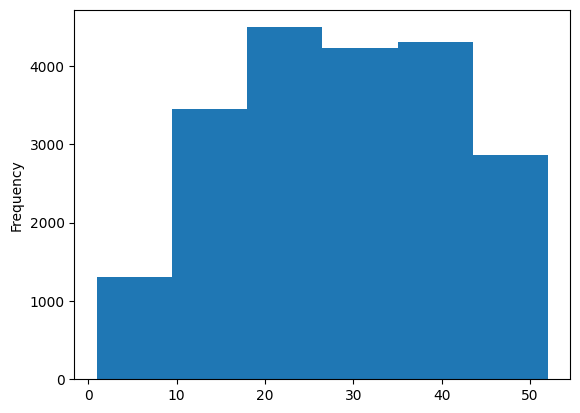

In [14]:
df["housing_median_age"].plot(kind="hist", bins=6)

<Axes: ylabel='Frequency'>

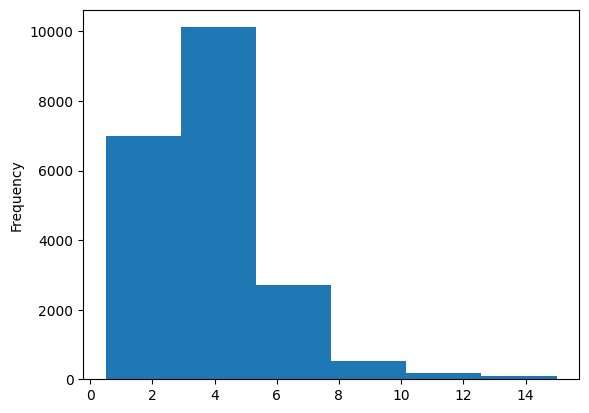

In [15]:
df["median_income"].plot(kind="hist", bins=6)

<Axes: >

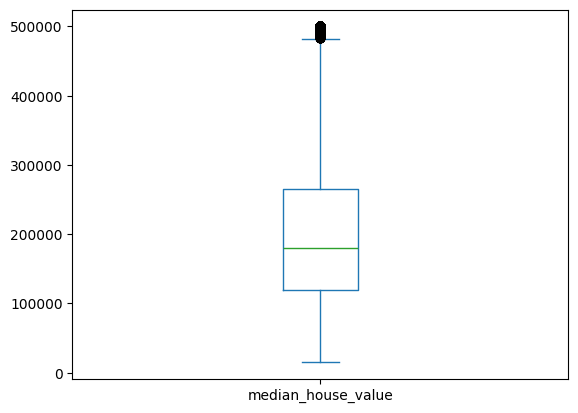

In [16]:
df["median_house_value"].plot(kind="box")

<Axes: ylabel='Frequency'>

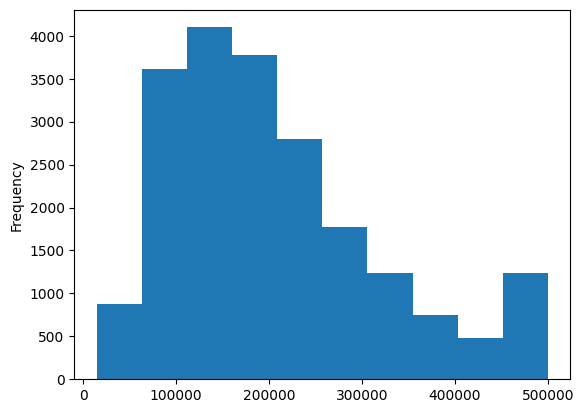

In [17]:
df["median_house_value"].plot(kind="hist")

looks interesting!

In [25]:
only_numeric = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = only_numeric.corr()

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

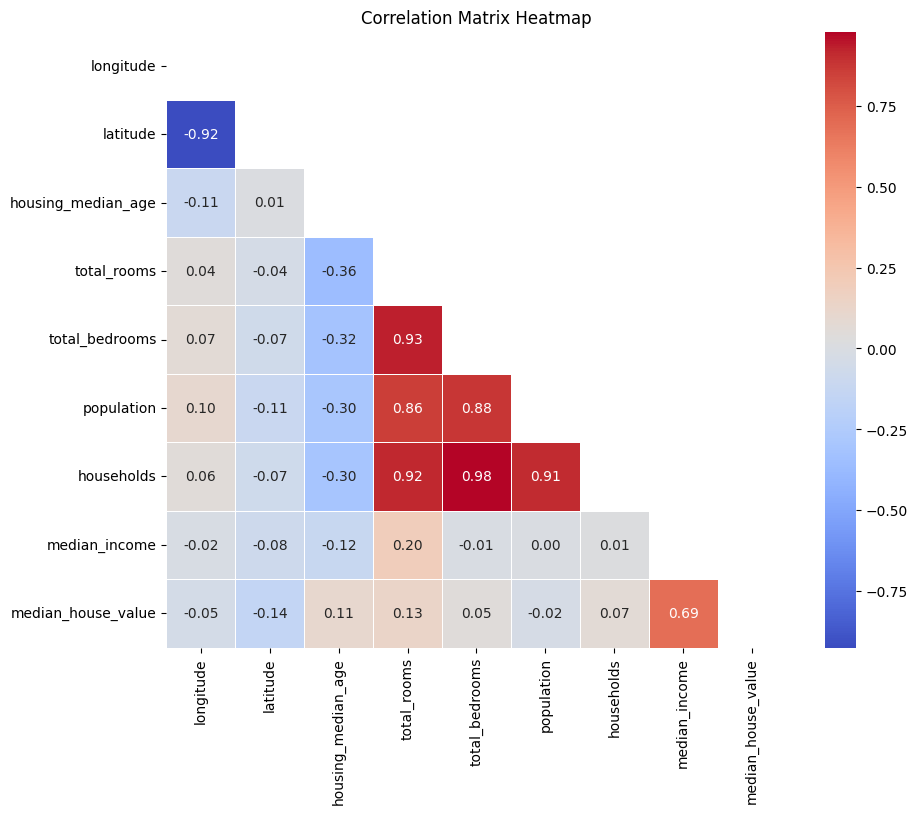

In [27]:
#create a heatmap
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Matrix Heatmap")

Here we can clearly make out wich columns have a positive linear relationship: 

total_bedroms - total_rooms

population - total_rooms

households - total_rooms

population - total_total bedrooms

households - total-bedrooms (very big correlation)

households - population

median_house_value - median_income (see below...)

negative linear relationship: longitude and latitude

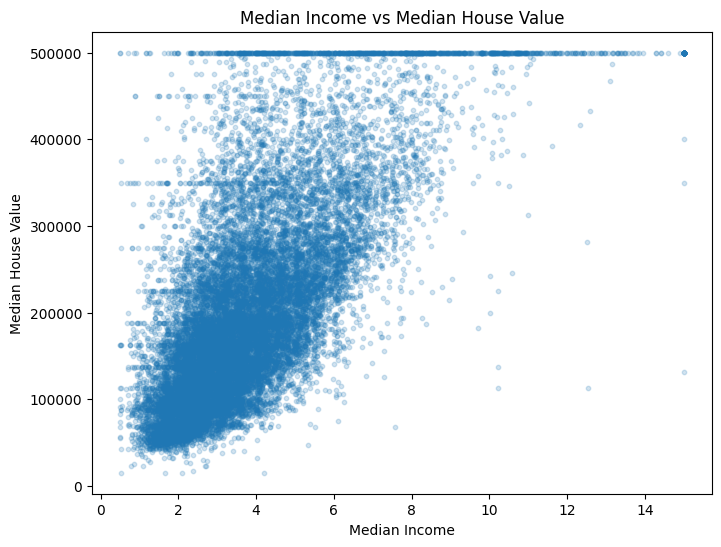

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df["median_income"], df["median_house_value"], alpha=0.2, s=10) 
#alpha makes dense areas visible

plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()

what can this mean? the higher the median income of the housing area, the higher are median house values. 
It is interesting with the horizontal line at 500 000 median house value... looks very strange. 

After som research --> That line indicates a "hard cap" on meadian_house_value. All the points in the line has exactly the same maximum value. The true house values above that level were clipped/censored. So the horizontal line is artificial. The cap seems to be 500 000. Everything above that threshold got recorded as the same number. 

Good to know that the median_house_value is actually censored. This also means that the correlation is distorted - the true relationshop between median house value and median income is much stronger than it appears.

Also evaluation metrics like RMSE  /MAE will underestimate error for expensive areas.

Depending on what modelling I want to do, there are different ways of handling this capping. Doing linear regression on this, would make the model very biased for high income areas.

Maybe for this lab it is better to keep it simple and not use this complicated parameter?

In [36]:
df["median_house_value"].value_counts().head()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
Name: count, dtype: int64

Unnatural amount of values at 500 000 - because it's artificial!

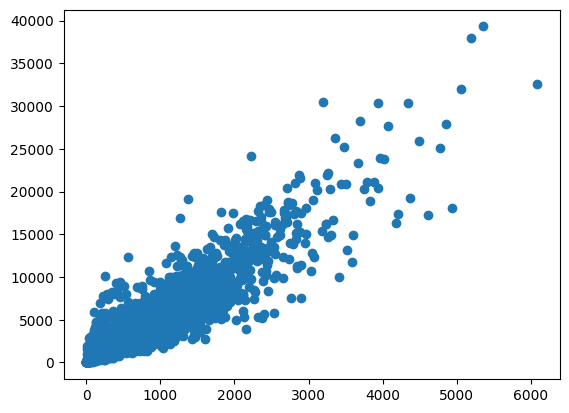

In [38]:
plt.scatter(df["households"], df["total_rooms"])